In [1]:
import threeplayers_v2 as ppp
import twoplayers as pp
import utility as util

import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from numba import jit
import numba as nb
from IPython.display import clear_output
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter

In [2]:
# set fineness of price grid
k = 48

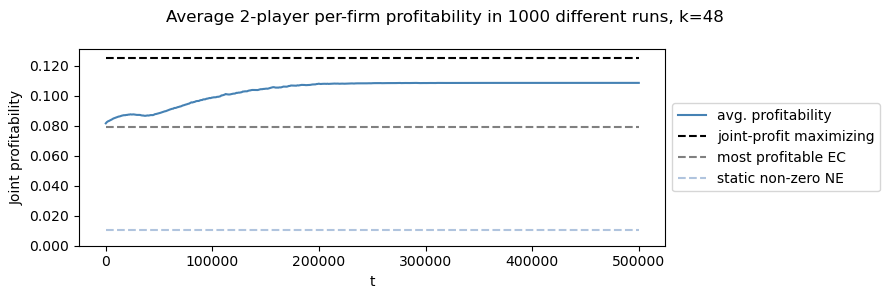

In [3]:
# plot profitability 2 players
alpha, delta = 0.3, 0.95  # valuesy from Klein(2021)
T = 500000
N = 1000
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/1000-1)
summed_avg_profitabilities = np.zeros(num_calcs)

for n in range(0, N):
    p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
    per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
    summed_avg_profitabilities = np.sum([summed_avg_profitabilities, per_firm_profit], axis=0)
    
avg_avg_profitabilities = np.divide(summed_avg_profitabilities, N)
    
fig, axs = plt.subplots(1, 1, figsize=(9,3))
fig.suptitle("Average 2-player per-firm profitability in {} different runs, k={}".format(N, k))
axs.set_xlabel("t")
axs.set_ylabel("Joint profitability")

xs = np.linspace(0, T, num_calcs)

# compute competitive benchmark profitabilities
benchprices2 = prices[:int(prices.size/2)+2]
bench2 = util.benchmark_two_player(benchprices2)
NE_profit = pp.profit(prices[1], prices[1])

axs.set_ylim(0.00, 0.125+(0.125*0.05))

axs.plot(xs, avg_avg_profitabilities, color="steelblue", label = "avg. profitability")
axs.plot(xs, [0.125]*len(xs), color='black', label='joint-profit maximizing', linestyle='dashed')
axs.plot(xs, [bench2]*len(xs), color='grey', label='most profitable EC', linestyle='dashed')
axs.plot(xs, [NE_profit]*len(xs), color='lightsteelblue', label='static non-zero NE', linestyle='dashed')
#axs.xaxis.set_major_locator(ticker.MultipleLocator(1))
axs.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
#plt.legend()
plt.savefig("figures/profitability2player_k%s.png"%k)

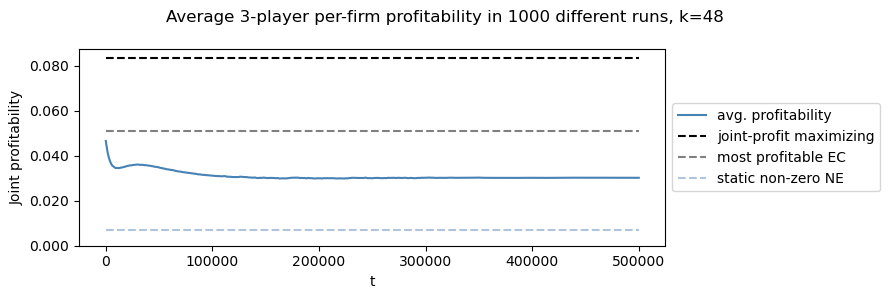

In [4]:
# plot profitability 3 players
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 1000
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/1000-1)
summed_avg_profitabilities = np.zeros(num_calcs)

for n in range(0, N):
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
    per_firm_profit = np.sum([avg_profs1, avg_profs2, avg_profs3], axis=0)/3
    summed_avg_profitabilities = np.sum([summed_avg_profitabilities, per_firm_profit], axis=0)
    
avg_avg_profitabilities = np.divide(summed_avg_profitabilities, N)
    
fig, axs = plt.subplots(1, 1, figsize=(9,3))

fig.suptitle("Average 3-player per-firm profitability in {} different runs, k={}".format(N, k))
axs.set_xlabel("t")
axs.set_ylabel("Joint profitability")

xs = np.linspace(0, T, num_calcs)

# compute competitive benchmark profitabilities
benchprices3 = prices[:int(prices.size/2)+3]
bench3 = util.benchmark_three_player(benchprices3)
NE_profit = ppp.profit(prices[1], prices[1], prices[1])

axs.set_ylim(0.0, 0.08333+(0.08333*0.05))
axs.plot(xs, avg_avg_profitabilities, color="steelblue", label = "avg. profitability")
axs.plot(xs, [0.08333]*len(xs), color='black', label='joint-profit maximizing', linestyle='dashed')
axs.plot(xs, [bench3]*len(xs), color='grey', label='most profitable EC', linestyle='dashed')
axs.plot(xs, [NE_profit]*len(xs), color='lightsteelblue', label='static non-zero NE', linestyle='dashed')
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#axs.xaxis.set_major_locator(ticker.MultipleLocator(1))
axs.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
fig.tight_layout()
#plt.legend()
plt.savefig("figures/profitability3player_k%s.png"%k)

def plot_complicity():
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 10
    prices = np.linspace(0, 1, k+1)
    num_calcs = int(T/1000-1)
    summed_avg_profitabilities_three = np.zeros(num_calcs)
    summed_avg_profitabilities_two = np.zeros(num_calcs)

    for n in range(0, N):
        p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
        per_firm_profit = np.sum([avg_profs1, avg_profs2, avg_profs3], axis=0)/3
        summed_avg_profitabilities_three = np.sum([summed_avg_profitabilities_three, per_firm_profit], axis=0)

        p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
        per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
        summed_avg_profitabilities_two = np.sum([summed_avg_profitabilities_two, per_firm_profit], axis=0)

    avg_avg_profitabilities_three = np.divide(summed_avg_profitabilities_three, N)
    avg_complicities_three = np.divide(avg_avg_profitabilities_three, 0.08333)

    avg_avg_profitabilities_two = np.divide(summed_avg_profitabilities_two, N)
    avg_complicities_two = np.divide(avg_avg_profitabilities_two, 0.125)

    fig, axs = plt.subplots(1)
    fig.suptitle("Avg. per-firm complicity ($\Delta$) in 100 different simulations (500000 runs each), k=%s"%k)
    fig.set_figheight(6)
    fig.set_figwidth(9)
    axs.set_xlabel("t")
    axs.set_ylabel("Complicity")
    axs.set_ylim(0, 1)
    xs = np.linspace(0, T, num_calcs)
    axs.plot(xs, avg_complicities_three, color="grey", label = "average complicity, three players", marker='o')
    axs.plot(xs, avg_complicities_two, color="black", label = "average complicity, two players", marker='o')
    #axs.plot(xs, [0.08333]*len(xs), color='orange', label='joint-profit maximizing', linestyle='dashed')
    
    # compute competitive benchmark profitabilities
    benchprices2 = prices[:int(prices.size/2)+2]
    benchprices3 = prices[:int(prices.size/2)+3]
    
    bench2 = util.benchmark_two_player(benchprices2)
    bench3 = util.benchmark_three_player(benchprices3)
    
    axs.plot(xs, [bench2/0.125]*len(xs), color='black', label='competitive benchmark, two players', linestyle='dashed')
    axs.plot(xs, [bench3/0.08333]*len(xs), color='grey', label='competitive benchmark, three players', linestyle='dashed')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    #axs.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #axs.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    #fig.tight_layout()
    plt.legend(loc='lower right')
    #plt.show()
    plt.savefig("figures/complicity_number_of_firms_k%s.png"%k)

plot_complicity()

## COMPLICITY DISTRIBUTION

@njit
def find_complicity_distribution3(k):
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 100
    prices = np.linspace(0, 1, k+1)
    #jointprofitability=[]
    #complicity=[]
    jointprofitability=nb.typed.List.empty_list(nb.f8)
    complicity_distribution=nb.typed.List.empty_list(nb.f8)
    for n in range(0, N):
        p_table, avg_profs0, avg_profs1, avg_profs2 = ppp.bertrand_simulation(alpha, delta, T, prices)
        complicity_distribution.append(((avg_profs0[-1]+avg_profs1[-1]+avg_profs2[-1])/3)/0.08333333333333333)
    return N, complicity_distribution

@njit
def find_complicity_distribution2(k):
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 100
    prices = np.linspace(0, 1, k+1)
    #jointprofitability=[]
    #complicity=[]
    jointprofitability=nb.typed.List.empty_list(nb.f8)
    complicity_distribution=nb.typed.List.empty_list(nb.f8)
    for n in range(0, N):
        p_table, avg_profs0, avg_profs1 = pp.bertrand_simulation(alpha, delta, T, prices)
        complicity_distribution.append(((avg_profs0[-1]+avg_profs1[-1])/2)/0.125)
    return N, complicity_distribution

fig, axs = plt.subplots(2, 1)


N, complicity_distribution = find_complicity_distribution2(k)
length = len(complicity_distribution)

bins = [i/10 for i in range(1, 11)]

axs[0].hist(complicity_distribution, bins=bins, rwidth=0.8, weights=np.ones(length) / length)
axs[0].set_xlabel('$\Delta$')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of complicity ($\Delta$) for {} runs 2 firms, k={}'.format(N, k))
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_xticks([(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)])
axs[0].set_xticklabels(['[{:.1f}, {:.1f}]'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)], rotation=45, ha='right')


N, complicity_distribution = find_complicity_distribution3(k)
length = len(complicity_distribution)

axs[1].hist(complicity_distribution, bins=bins, rwidth=0.8, weights=np.ones(length) / length)

axs[1].set_xlabel('$\Delta$')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of complicity ($\Delta$) for {} runs 3 firms, k={}'.format(N, k))
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_xticks([(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)])
axs[1].set_xticklabels(['[{:.1f}, {:.1f}]'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)], rotation=45, ha='right')

plt.tight_layout()
plt.savefig("figures/complicity_histogram_k%s.png"%k)

## Robustness in k
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 100

joint_profitability = np.zeros(int(T/50000 - 1))
ks = [6, 12, 18, 24, 30, 36, 42, 48]
avg_complicities_three = []
avg_complicities_two = []

for idx, k in enumerate(ks):
    prices = np.linspace(0, 1, k+1)
    #for n in range(0, N):
    #    p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
    #    last_joint_profitability = (avg_profs1[-1] + avg_profs2[-1]) / 2
    #    last_joint_profitabilities[idx, n] = last_joint_profitability
    #avg_last_joint_profitabilities.append(np.divide(np.sum(last_joint_profitabilities[idx, :]), N))
    
    per_firm_profitabilities_three = np.zeros(N)
    per_firm_profitabilities_two = np.zeros(N)
    
    for n in range(0, N):
        # 3 player simulation
        p_table, avg_profs0, avg_profs1, avg_profs2 = ppp.bertrand_simulation(alpha, delta, T, prices)
        last_per_firm_profitability_three = (avg_profs0[-1] + avg_profs1[-1] + avg_profs2[-1]) / 3
        per_firm_profitabilities_three[n] = last_per_firm_profitability_three
        
        
        # 2 player simulation
        p_table, avg_profs0, avg_profs1 = pp.bertrand_simulation(alpha, delta, T, prices)
        last_per_firm_profitability_two = (avg_profs0[-1] + avg_profs1[-1]) / 2
        per_firm_profitabilities_two[n] = last_per_firm_profitability_two
    
    avg_per_firm_profitability_three = np.mean(per_firm_profitabilities_three)
    avg_per_firm_profitability_two = np.mean(per_firm_profitabilities_two)
    
    #print("avg_per_firm_profitability_three", avg_per_firm_profitability_three)
    #print("avg_per_firm_profitability_two", avg_per_firm_profitability_two)
    
    # divide profitability by monopoly profit to get complicity
    avg_complicity_three = np.divide(avg_per_firm_profitability_three, 0.08333)
    avg_complicity_two = np.divide(avg_per_firm_profitability_two, 0.125)
    
    avg_complicities_three.append(avg_complicity_three)
    avg_complicities_two.append(avg_complicity_two)
    
fig, axs = plt.subplots(1)
fig.suptitle("Average complicity $\Delta$, {} simulations, varying fineness in price grid".format(N))
fig.set_figheight(6)
fig.set_figwidth(8)
axs.set_xlabel("$k$")
axs.set_ylabel("Average complicity")

benchprices2 = prices[:int(prices.size/2)+2]
bench2 = util.benchmark_two_player(benchprices2)
NE_profit = pp.profit(prices[1], prices[1])

axs.set_xlim(ks[0], ks[-1])
axs.set_ylim(0.00, 1)

axs.plot(ks, avg_complicities_three, color="orange", label = "Avg. complicity, three players", marker='o')
axs.plot(ks, avg_complicities_two, color="steelblue", label = "Avg. complicity, two players", marker='o')
#axs.plot(ks, [bench2]*len(ks), color='grey', label='most profitable EC', linestyle='dashed')
#axs.plot(ks, [NE_profit]*len(ks), color='lightsteelblue', label='static non-zero NE', linestyle='dashed')

axs.xaxis.set_major_locator(ticker.MultipleLocator(6))
axs.yaxis.set_major_formatter(PercentFormatter(1))
fig.tight_layout()
plt.legend()
#plt.show()
plt.savefig("figures/complicity_over_k.png")

## useless plots, we will not use these
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10
prices = np.linspace(0, 1, 7)
num_calcs = int(T/12500-1)
variances2 = np.zeros(num_calcs)
variances3 = np.zeros(num_calcs)
fig, axs = plt.subplots(N, figsize=(8,29))
for n in range(0, N):
    p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
    
    # compute rolling avg price variance over time
    for i in range(0, T, 12500):
        if i >= 12500:
            var0 = np.var(p_table[0, i-1000:i])
            var1 = np.var(p_table[1, i-1000:i])
            avg_var = np.mean([var0, var1])
            variances2[int(i/12500)-1] = avg_var
        else:
            pass
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
    for i in range(0, T, 12500):
        if i >= 12500:
            var0 = np.var(p_table[0, i-1000:i])
            var1 = np.var(p_table[1, i-1000:i])
            var2 = np.var(p_table[2, i-1000:i])
            avg_var = np.mean([var0, var1, var2])
            variances3[int(i/12500)-1] = avg_var
        else:
            pass
    fig.suptitle("Average variance in price over time")
    #fig.set_figheight(6)
    #fig.set_figwidth(9)
    axs[n].set_xlabel("t")
    axs[n].set_ylabel("Price variance")
    xs = np.linspace(0, T, num_calcs)
    axs[n].plot(xs, variances2, color="grey", label = "two players", marker='o')
    axs[n].plot(xs, variances3, color="black", label = "three players", marker='o')
    axs[n].legend(loc='upper right')
fig.tight_layout()
plt.show()

for k in [6, 12, 24, 48]:
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 100
    prices = np.linspace(0, 1, k+1)
    num_calcs = int(T/12500-1)

    cycle2 = 0
    fixed2 = 0
    cycle3 = 0
    fixed3 = 0

    for n in range(0, N):
        p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
        var0 = np.var(p_table[0, -1000:])
        var1 = np.var(p_table[1, -1000:])
        avg_var = np.mean([var0, var1])
        if abs(avg_var - 0) < 0.01:
            fixed2 += 1
        else:
            cycle2 += 1

        p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
        var0 = np.var(p_table[0, -1000:])
        var1 = np.var(p_table[1, -1000:])
        var2 = np.var(p_table[2, -1000:])
        avg_var = np.mean([var0, var1, var2])
        if abs(avg_var - 0) < 0.01:
            fixed3 += 1
        else:
            cycle3 += 1

    fig, axs = plt.subplots(1, 2)
    fig.suptitle("End-game strategy outcomes, k={} ({} runs)".format(k, N))
    strats = ['fixed price','varying prices']
    outcomes = [fixed2, cycle2]
    axs[0].set_xlabel("Strategy outcome, two players")
    axs[0].set_ylabel("Frequency")
    axs[0].set_ylim(0, N)
    axs[0].bar(strats, outcomes)
    #axs[0].legend(loc='upper right')

    outcomes = [fixed3, cycle3]
    axs[1].set_xlabel("Strategy outcome, three players")
    axs[1].set_ylabel("Frequency")
    axs[1].set_ylim(0, N)
    axs[1].bar(strats, outcomes)
    #axs[1].legend(loc='upper right')

    fig.tight_layout()
    #plt.show()
    plt.savefig("figures/strategyoutcomes_k%s"%k)

## Price cycles 2 and 3 players
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/12500-1)

cycle2 = 0
fixed2 = 0
cycle3 = 0
fixed3 = 0


for n in range(0, N):
    p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
    
    # grab section of last 50 prices for inspection
    p0s2d = p_table[0, 499950:500000]
    p1s2d = p_table[1, 499950:500000]
        
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
    
    # grab section of last 50 prices for inspection
    p0s3d = p_table[0, 499950:500000]
    p1s3d = p_table[1, 499950:500000]
    p2s3d = p_table[2, 499950:500000]
    
fig, axs = plt.subplots(2, 1, figsize=(9, 4), constrained_layout=True)
fig.suptitle("Price history close to termination, k=%s"%k)

p0s2d = p0s2d[np.arange(0, p0s2d.size, 2)][:-1]
p1s2d = p1s2d[np.arange(1, p1s2d.size, 2)][:-1]

axs[0].set_xlabel("t")
axs[0].set_ylabel("price")
axs[0].plot(range(0, 48, 2), p0s2d , label="firm 0 prices", marker="^",linestyle="dotted")
axs[0].plot(range(1, 48, 2), p1s2d, label="firm 1 prices", marker="^", color="orange", linestyle="dotted")
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

p0s3d = p0s3d[np.arange(0, p0s3d.size, 3)][:-1]
p1s3d = p1s3d[np.arange(1, p1s3d.size, 3)][:-1]
p2s3d = p2s3d[np.arange(2, p2s3d.size, 3)][:-1]

axs[1].set_xlabel("t")
axs[1].set_ylabel("price")
axs[1].plot(range(0, 48, 3), p0s3d , label="firm 0 prices", marker="^", linestyle="dotted")
axs[1].plot(range(1, 48, 3), p1s3d, label="firm 1 prices", marker="^", color="orange", linestyle="dotted")
axs[1].plot(range(2, 47, 3), p2s3d, label="firm 2 prices", marker="^", color="green", linestyle="dotted")
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

#fig.tight_layout()
#plt.show()
plt.savefig("figures/pricehistories_k%s.png"%k)

fig, axs = plt.subplots(2, 1, figsize=(9, 4), constrained_layout=True)
fig.suptitle("Price history close to termination, k=%s"%k)

axs[0].set_xlabel("t")
axs[0].set_ylabel("price")
axs[0].plot(range(0, 48, 2), p0s2d , label="firm 0 prices", marker="^",linestyle="dotted")
axs[0].plot(range(1, 48, 2), p1s2d, label="firm 1 prices", marker="^", color="orange", linestyle="dotted")
# Put a legend to the right of the current axis
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axs[1].set_xlabel("t")
axs[1].set_ylabel("price")
axs[1].plot(range(0, 48, 3), p0s3d , label="firm 0 prices", marker="^", linestyle="dotted")
axs[1].plot(range(1, 48, 3), p1s3d, label="firm 1 prices", marker="^", color="orange", linestyle="dotted")
axs[1].plot(range(2, 48, 3), p2s3d, label="firm 2 prices", marker="^", color="green", linestyle="dotted")

# Put a legend to the right of the current axis
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.subplots_adjust(bottom=0.25, top=0.75,)
#plt.show()
plt.savefig("figures/pricehistories_k%s.png"%k) 

# FORCED DEVIATION 2 PLAYERS
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 1000
prices = np.linspace(0, 1, 13)

avg_p_0s = np.zeros(30)
avg_p_1s = np.zeros(30)
avg_prof0s = np.zeros(30)
avg_prof1s = np.zeros(30)
ctr = 0 # counts number of fixed-price strategy runs
for n in range(0, N):
    p_table, avg_profs0, avg_profs1 = pp.bertrand_simulation_forced_deviation(alpha, delta, T, prices)
    lastps0 = p_table[0, -1000:]
    lastps1 = p_table[1, -1000:]
    var0 = np.var(lastps0[:800])
    var1 = np.var(lastps1[:800])
    avg_var = np.mean([var0, var1])
    
    if abs(avg_var - 0) > 0.01: 
        """
        If the variance in the prices prior to the deviation was too high, we were in a price cycle,
        but since we only want to observe fixed price strategy deviations, we must discard this run.
        """
        continue
    p_0s = p_table[0, 499890:499920] # firm 0 prices before and after deviation
    p_1s = p_table[1, 499890:499920] # firm 1 prices before and after deviation
    # compute profits for each price
    prof0s = [pp.profit(p0t, p1t) for p0t, p1t in zip(p_0s, p_1s)]
    prof1s = [pp.profit(p1t, p0t) for p0t, p1t in zip(p_0s, p_1s)]
    
    avg_p_0s = np.sum([avg_p_0s, p_0s], axis = 0)
    avg_p_1s = np.sum([avg_p_1s, p_1s], axis = 0)
    
    avg_prof0s = np.sum([avg_prof0s, prof0s], axis = 0)
    avg_prof1s = np.sum([avg_prof1s, prof1s], axis = 0)
    
    ctr += 1
# divide all price and profits arrays by number of fixed-price strategy runs
avg_p_0s = np.divide(avg_p_0s, ctr)
avg_p_1s = np.divide(avg_p_1s, ctr)
avg_prof0s = np.divide(avg_prof0s, ctr)
avg_prof1s = np.divide(avg_prof1s, ctr)

fig, axs = plt.subplots(2, 1, figsize=(7, 5))
fig.suptitle("Average price and profit after forced deviation (%s runs)"%ctr)

# reduce price arrays to only contain prices where the firm is able to set the price
avg_p_0s = np.delete(avg_p_0s, np.arange(0, avg_p_0s.size, 2))
avg_p_1s = np.delete(avg_p_1s, np.arange(1, avg_p_1s.size, 2))[1:]

axs[0].set_xlabel("t")
axs[0].set_ylabel("Avg. price")
axs[0].plot(range(-10, 20, 2), avg_p_0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[0].plot(range(-9, 19, 2), avg_p_1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[0].axvline(x = 0, color = 'grey', linestyle='dotted')

axs[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[0].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
for tick in axs[0].get_xticklabels():
    tick.set_rotation(45)

axs[0].legend()

# reduce profit arrays into two-period profits
avg_prof0s = np.add.reduceat(avg_prof0s, np.arange(1, avg_prof0s.size, 2))[:-1]
avg_prof1s = np.add.reduceat(avg_prof1s, np.arange(0, avg_prof1s.size, 2))

# compute sums of profits for each firm. Was there anything to gain from the deviation?

# pre-deviation profits (profits deviator would have gotten)
pre_total_prof0 = np.sum(avg_prof0s[0]) * 15 # profit for 30 periods, since we just reduced to two-period profits
pre_total_prof1 = np.sum(avg_prof1s[0]) * 15

# post-deviation profits
post_total_prof0 = np.sum(avg_prof0s)
post_total_prof1 = np.sum(avg_prof1s)

axs[1].set_xlabel("t")
axs[1].set_ylabel("Avg. two-period profit")
axs[1].plot(range(-8, 20, 2), avg_prof0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[1].plot(range(-9, 21, 2), avg_prof1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
#axs[1].annotate("pre-deviation 30-period profit: %s"%pre_total_prof0, (-8, avg_prof0s[0]))
#axs[1].annotate("post-deviation 30-period profit: %s"%post_total_prof0, (20, avg_prof0s[-1]))
axs[1].axvline(x = 0, color = 'grey', linestyle='dotted')
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[1].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
for tick in axs[1].get_xticklabels():
    tick.set_rotation(45)
axs[1].legend()

print("Average 30-period pre-deviation profit is: ", pre_total_prof0)
print("Average 30-period profit including deviation: ", post_total_prof0)

fig.tight_layout()
#plt.show()
plt.savefig("figures/forced_deviation2.png")

# FORCED DEVIATION 2 PLAYERS
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 1000
prices = np.linspace(0, 1, 13)

avg_p_0s = np.zeros(22)
avg_p_1s = np.zeros(22)
avg_prof0s = np.zeros(22)
avg_prof1s = np.zeros(22)
ctr = 0 # counts number of fixed-price strategy runs
for n in range(0, N):
    p_table, avg_profs0, avg_profs1 = pp.bertrand_simulation_forced_deviation(alpha, delta, T, prices)
    lastps0 = p_table[0, -1000:]
    lastps1 = p_table[1, -1000:]
    var0 = np.var(lastps0[:800])
    var1 = np.var(lastps1[:800])
    avg_var = np.mean([var0, var1])
    
    if abs(avg_var - 0) > 0.01: 
        """
        If the variance in the prices prior to the deviation was too high, we were in a price cycle,
        but since we only want to observe fixed price strategy deviations, we must discard this run.
        """
        continue
    p_0s = p_table[0, 499894:499916] # firm 0 prices before and after deviation
    p_1s = p_table[1, 499894:499916] # firm 1 prices before and after deviation
    # compute profits for each price
    prof0s = [pp.profit(p0t, p1t) for p0t, p1t in zip(p_0s, p_1s)]
    prof1s = [pp.profit(p1t, p0t) for p0t, p1t in zip(p_0s, p_1s)]
    
    avg_p_0s = np.sum([avg_p_0s, p_0s], axis = 0)
    avg_p_1s = np.sum([avg_p_1s, p_1s], axis = 0)
    
    avg_prof0s = np.sum([avg_prof0s, prof0s], axis = 0)
    avg_prof1s = np.sum([avg_prof1s, prof1s], axis = 0)
    
    ctr += 1
# divide all price and profits arrays by number of fixed-price strategy runs
avg_p_0s = np.divide(avg_p_0s, ctr)
avg_p_1s = np.divide(avg_p_1s, ctr)
avg_prof0s = np.divide(avg_prof0s, ctr)
avg_prof1s = np.divide(avg_prof1s, ctr)

fig, axs = plt.subplots(2)
fig.suptitle("Average price and profit after forced deviation (%s runs)"%ctr)

print("p_0s:", avg_p_0s)
print("p_1s:", avg_p_1s)

avg_p_0s = np.delete(avg_p_0s, np.arange(0, avg_p_0s.size, 2))
avg_p_1s = np.delete(avg_p_1s, np.arange(1, avg_p_1s.size, 2))[1:]

print("reduced p_0s:", avg_p_0s)
print("reduced p_1s:", avg_p_1s)

axs[0].set_xlabel("t")
axs[0].set_ylabel("Avg. price")
axs[0].plot(range(-6, 16, 2), avg_p_0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[0].plot(range(-5, 15, 2), avg_p_1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[0].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
axs[0].legend()

# reduce profit arrays into two-period profits
print("prof0:", avg_prof0s)
print("prof1:", avg_prof1s)

avg_prof0s = np.add.reduceat(avg_prof0s, np.arange(1, avg_prof0s.size, 2))[:-1]
avg_prof1s = np.add.reduceat(avg_prof1s, np.arange(0, avg_prof1s.size, 2))

#print("reduced prof0:", avg_prof0s)
#print("reduced prof1:", avg_prof1s)

axs[1].set_xlabel("t")
axs[1].set_ylabel("Avg. two-period profit")
axs[1].plot(range(-4, 16, 2), avg_prof0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[1].plot(range(-5, 16, 2), avg_prof1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[1].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
axs[1].legend()

fig.tight_layout()
#plt.show()
plt.savefig("figures/forced_deviation2.png")

def two_period_reduce(lst):
    if lst.size % 2 != 0:
        print("Error! Array is not even length")
        return
    reduced_lst = np.zeros(int(lst.size/2))
    for i in range(0, lst.size, 1):
        
        if i % 2 == 1:
            summed = lst[i] + lst[i-1]
            reduced_lst[int(i/2)] = summed
    return reduced_lst
        
lst = np.array([1,2,3,4,5,6,7,8,9,10])
print(two_period_reduce(lst))
print(np.add.reduceat(lst, np.arange(0, lst.size, 2)))
print(np.add.reduceat(lst, np.arange(1, lst.size, 2))[:-1])

# FORCED DEVIATION 3 PLAYERS
"""
Important note:
Since the fixed-price strategy prices are substantially lower in the 3 player game,
the deviator firm would set price=0, which would be an irrational price to set,
as there is no profit to be gained. To fix this, we need a finer price grid, but this again
muddies the comparison between the 2- and 3-player game. We should discuss this in the report.
"""

alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10

prices = np.linspace(0, 1, 7)
#prices = np.insert(prices, 1, 0.005)
avg_p_0s = np.zeros(21)
avg_p_1s = np.zeros(21)
avg_p_2s = np.zeros(21)

avg_prof0s = np.zeros(21)
avg_prof1s = np.zeros(21)
avg_prof2s = np.zeros(21)

ctr = 0 # counts number of fixed-price strategy runs
for n in range(0, N):
    p_table, avg_profs0, avg_profs1, avg_profs2 = ppp.bertrand_simulation_forced_deviation(alpha, delta, T, prices)
    
    lastps0 = p_table[0, -1000:]
    lastps1 = p_table[1, -1000:]
    lastps2 = p_table[2, -1000:]
    
    if not (np.array_equal(lastps0[:800], lastps1[:800]) and np.array_equal(lastps1[:800], lastps2[:800])):
        print("prices were not coordinated")
        continue

    p_0s = p_table[0, 499893:499914] # firm 0 prices before and after deviation
    p_1s = p_table[1, 499893:499914] # firm 1 prices before and after deviation
    p_2s = p_table[2, 499893:499914] # firm 2 prices
    # compute profits for each price
    prof0s = [ppp.profit(p0t, p1t, p2t) for p0t, p1t, p2t in zip(p_0s, p_1s, p_2s)]
    prof1s = [ppp.profit(p1t, p2t, p0t) for p0t, p1t, p2t in zip(p_0s, p_1s, p_2s)]
    prof2s = [ppp.profit(p2t, p0t, p1t) for p0t, p1t, p2t in zip(p_0s, p_1s, p_2s)]
    
    avg_p_0s = np.sum([avg_p_0s, p_0s], axis = 0)
    avg_p_1s = np.sum([avg_p_1s, p_1s], axis = 0)
    avg_p_2s = np.sum([avg_p_2s, p_2s], axis = 0)
    
    avg_prof0s = np.sum([avg_prof0s, prof0s], axis = 0)
    avg_prof1s = np.sum([avg_prof1s, prof1s], axis = 0)
    avg_prof2s = np.sum([avg_prof2s, prof2s], axis = 0)
    
    ctr += 1
if ctr != 0:   
    # divide all price and profits arrays by number of fixed-price strategy runs
    avg_p_0s = np.divide(avg_p_0s, ctr)
    avg_p_1s = np.divide(avg_p_1s, ctr)
    avg_p_2s = np.divide(avg_p_2s, ctr)
    avg_prof0s = np.divide(avg_prof0s, ctr)
    avg_prof1s = np.divide(avg_prof1s, ctr)
    avg_prof2s = np.divide(avg_prof2s, ctr)
else:
    print("Error! there were no fixed price strategy runs")
    
fig, axs = plt.subplots(2, figsize=(10, 4))
fig.suptitle("Average price and profit after forced deviation (%s runs)"%ctr)

#avg_p_0s = np.delete(avg_p_0s, np.arange(0, avg_p_0s.size, 3))[:-1]
#avg_p_1s = np.delete(avg_p_1s, np.arange(1, avg_p_1s.size, 3))[:-1]
#avg_p_2s = np.delete(avg_p_2s, np.arange(2, avg_p_2s.size, 3))[:-1]

print("avg_p_0s:")
print(avg_p_0s)
print("avg_p_1s:")
print(avg_p_1s)
print("avg_p_2s:")
print(avg_p_2s)

avg_p_0s = avg_p_0s[np.arange(0, avg_p_0s.size, 3)]
avg_p_1s = avg_p_1s[np.arange(1, avg_p_1s.size, 3)]
avg_p_2s = avg_p_2s[np.arange(2, avg_p_2s.size, 3)]

avg_p_0s = avg_p_0s#[:-1]
avg_p_1s = avg_p_1s#[:-1]
avg_p_2s = avg_p_2s#[:-1]

axs[0].set_xlabel("t")
axs[0].set_ylabel("Avg. price")
#axs[0].plot(range(-3, 15, 3), avg_p_0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
#axs[0].plot(range(-5, 13, 3), avg_p_1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
#axs[0].plot(range(-4, 14, 3), avg_p_2s, label="Firm 2", color = "green", marker="s", linestyle="dotted")
axs[0].plot(range(893, 912, 3), avg_p_0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[0].plot(range(894, 913, 3), avg_p_1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[0].plot(range(895, 914, 3), avg_p_2s, label="Firm 2", color = "green", marker="s", linestyle="dotted")


axs[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[0].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
axs[0].legend()

## reduce profit arrays into three-period profits
#print("prof0s:")
#print(avg_prof0s)
#print("prof1s:")
#print(avg_prof1s)
#print("prof2s: ")
#print(avg_prof2s)

avg_prof0s = np.add.reduceat(avg_prof0s, np.arange(0, avg_prof0s.size, 3))#[:-1]
avg_prof1s = np.add.reduceat(avg_prof1s, np.arange(0, avg_prof1s.size, 3))#[:-1]
avg_prof2s = np.add.reduceat(avg_prof2s, np.arange(0, avg_prof2s.size, 3))#[:-1]

axs[1].set_xlabel("t")
axs[1].set_ylabel("Avg. three-period profit")
#axs[1].plot(range(-3, 15, 3), avg_prof0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
#axs[1].plot(range(-5, 13, 3), avg_prof1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
#axs[1].plot(range(-4, 14, 3), avg_prof2s, label="Firm 2", color = "green", marker="s", linestyle="dotted")

#print(avg_prof0s)
#print(avg_prof1s)
#print(avg_prof2s)

axs[1].plot(range(893, 912, 3), avg_prof0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[1].plot(range(894, 913, 3), avg_prof1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[1].plot(range(895, 914, 3), avg_prof2s, label="Firm 2", color = "green", marker="s", linestyle="dotted")

axs[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[1].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
axs[1].legend()

fig.tight_layout()
plt.show()
#plt.savefig("forced_deviation3.png")

# UNCOMMENT FOR CONVERGENCE PLOT 3P
# Convergence 3 player
k_array=[6,12,24,48]
for k in k_array:
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 100
    prices = np.linspace(0, 1, k)
    Q_norm_summed0 = np.zeros(int(T/1000 - 1))
    Q_norm_summed1 = np.zeros(int(T/1000 - 1))
    Q_norm_summed2 = np.zeros(int(T/1000 - 1))

    for n in range(0, N):
        p_table, Q_norm_array0, Q_norm_array1, Q_norm_array2 = ppp.bertrand_simulation_convergence(alpha, delta, T, prices)
        Q_norm_summed0 = np.sum([Q_norm_summed0, Q_norm_array0], axis=0)
        Q_norm_summed1 = np.sum([Q_norm_summed1, Q_norm_array1], axis=0)
        Q_norm_summed2 = np.sum([Q_norm_summed2, Q_norm_array2], axis=0)

    Q_norm_summed0 = Q_norm_summed0/N
    Q_norm_summed1 = Q_norm_summed1/N
    Q_norm_summed2 = Q_norm_summed2/N
    # Convergence plot

    # Generate the index array
    index = np.linspace(1000, 500000, 499)

    # Plot the arrays on the same plot
    plt.plot(index, Q_norm_summed0, label='Q-learner 0')
    plt.plot(index, Q_norm_summed1, label='Q-learner 1')
    plt.plot(index, Q_norm_summed2, label='Q-learner 2')

    # Set labels and title
    plt.xlabel('t')
    plt.ylabel('Frobenius norm of the difference in the Q-matrix')
    plt.title(f'Convergence of Q-matrix, k = {k}, average of 100 runs')

    # Show legend
    plt.legend()

    # Display the plot
    plt.savefig(f'convergenceP3k{k}.png', facecolor='w')
    plt.show()

# UNCOMMENT FOR CONVERGENCE PLOT
# Convergence 2 player
k_array=[6,12,24,48]
for k in k_array:
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 100
    prices = np.linspace(0, 1, k)
    Q_norm_summed0 = np.zeros(int(T/1000 - 1))
    Q_norm_summed1 = np.zeros(int(T/1000 - 1))

    for n in range(0, N):
        p_table, Q_norm_array0, Q_norm_array1 = pp.bertrand_simulation_convergence(alpha, delta, T, prices)
        Q_norm_summed0 = np.sum([Q_norm_summed0, Q_norm_array0], axis=0)
        Q_norm_summed1 = np.sum([Q_norm_summed1, Q_norm_array1], axis=0)

    Q_norm_summed0 = Q_norm_summed0/N
    Q_norm_summed1 = Q_norm_summed1/N
    # Convergence plot

    # Generate the index array
    index = np.linspace(1000, 500000, 499)

    # Plot the arrays on the same plot
    plt.plot(index, Q_norm_summed0, label='Q-learner 0')
    plt.plot(index, Q_norm_summed1, label='Q-learner 1')

    # Set labels and title
    plt.xlabel('t')
    plt.ylabel('Frobenius norm of the difference in the Q-matrix')
    plt.title(f'Convergence of Q-matrix, k = {k}, average of 100 runs')

    # Show legend
    plt.legend()

    # Display the plot
    plt.savefig(f'convergenceP2k{k}.png', facecolor='w')
    plt.show()

## Price cycles 3 players and profits
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 1
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/12500-1)

for n in range(0, N):
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
    
    # grab section of last 50 prices for inspection
    p0s3d = p_table[0, 499950:500000]
    p1s3d = p_table[1, 499950:500000]
    p2s3d = p_table[2, 499950:500000]
    
# compute profits for each price
prof0s = [ppp.profit(p0t, p1t, p2t) for p0t, p1t, p2t in zip(p0s3d, p1s3d, p2s3d)]
prof1s = [ppp.profit(p1t, p2t, p0t) for p0t, p1t, p2t in zip(p0s3d, p1s3d, p2s3d)]
prof2s = [ppp.profit(p2t, p0t, p1t) for p0t, p1t, p2t in zip(p0s3d, p1s3d, p2s3d)]
total_profs = np.sum([prof0s, prof1s, prof2s], axis=0)

# check for division-by-zero errors
if 0 in total_profs:
    print("Error! One period had zero profit, division not possible. Try another run.")

share_prof0s = np.divide(prof0s, total_profs)
share_prof1s = np.divide(prof1s, total_profs)
share_prof2s = np.divide(prof2s, total_profs)

#print("total_profs: ", total_profs[0:10])
#print("share_prof0s: ", share_prof0s[0:10])
#print("share_prof1s: ", share_prof1s[0:10])
#print("share_prof2s: ", share_prof2s[0:10])


fig, axs = plt.subplots(3, 1, figsize=(9, 7), gridspec_kw={'height_ratios': [3, 3, 1]})
fig.suptitle("Price history close to termination, k=%s"%k)

p0s3d = p0s3d[np.arange(0, p0s3d.size, 3)][:-1]
p1s3d = p1s3d[np.arange(1, p1s3d.size, 3)][:-1]
p2s3d = p2s3d[np.arange(2, p2s3d.size, 3)][:-1]

axs[0].set_xlabel("t")
axs[0].set_ylabel("price")
axs[0].plot(range(0, 48, 3), p0s3d , label="firm 0 prices", marker="^", linestyle="dotted")
axs[0].plot(range(1, 48, 3), p1s3d, label="firm 1 prices", marker="^", color="orange", linestyle="dotted")
axs[0].plot(range(2, 47, 3), p2s3d, label="firm 2 prices", marker="^", color="green", linestyle="dotted")
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# reduce each firms profit share to 3-period profit for each firms turn
reduced_share_prof0s = np.add.reduceat(share_prof0s/3, np.arange(0, share_prof0s.size, 3))[:-1]
reduced_share_prof1s = np.add.reduceat(share_prof1s/3, np.arange(1, share_prof1s.size, 3))[:-1]
reduced_share_prof2s = np.add.reduceat(share_prof2s/3, np.arange(2, share_prof2s.size, 3))[:-1]

summed_prof0 = np.sum(prof0s[:-1])# remember to remove last element like above
summed_prof1 = np.sum(prof1s[:-1])
summed_prof2 = np.sum(prof2s[:-1])

axs[1].set_xlabel("t")
axs[1].set_ylabel("share of total profit")
axs[1].plot(range(0, 48, 3), reduced_share_prof0s, label="firm 0 3-period share of profit", marker="o", linestyle="dotted")
axs[1].plot(range(1, 48, 3), reduced_share_prof1s, label="firm 1 3-period share of profit", marker="o", color="orange", linestyle="dotted")
axs[1].plot(range(2, 47, 3), reduced_share_prof2s, label="firm 2 3-period share of profit", marker="o", color="green", linestyle="dotted")
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

axs[2].axis("off")
tab = [['Firm 0 total profit:',"{}".format(summed_prof0)],
       ['Firm 1 total profit:',"{}".format(summed_prof1)],
       ['Firm 2 total profit:',"{}".format(summed_prof2)]]
axs[2].table(tab, loc='center')

fig.tight_layout()
#plt.show()
plt.savefig("figures/pricecycles_profitshares_k%s.png"%k)

# how many runs ended in 0 profit for 1 firm?
#ks = [6, 12, 24, 48]

alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 100
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/12500-1)

zero_prof_runs = 0
profitable_runs = 0

for n in range(0, N):
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
    
    # grab section of last 50 prices for inspection
    p0s3d = p_table[0, 499950:500000]
    p1s3d = p_table[1, 499950:500000]
    p2s3d = p_table[2, 499950:500000]
    
    #compute profits for each price
    prof0s = np.array([ppp.profit(p0t, p1t, p2t) for p0t, p1t, p2t in zip(p0s3d, p1s3d, p2s3d)])
    prof1s = np.array([ppp.profit(p1t, p2t, p0t) for p0t, p1t, p2t in zip(p0s3d, p1s3d, p2s3d)])
    prof2s = np.array([ppp.profit(p2t, p0t, p1t) for p0t, p1t, p2t in zip(p0s3d, p1s3d, p2s3d)])
    if np.allclose(prof0s, np.zeros(prof0s.size)) or np.allclose(prof1s, np.zeros(prof1s.size)) or np.allclose(prof2s, np.zeros(prof2s.size)):
        zero_prof_runs += 1
    else:
        profitable_runs += 1
    

fig, axs = plt.subplots(1, 1)
fig.suptitle("Zero profit run for 1 or more firms, k={} ({} runs)".format(k, N))
strats = ['zero profit runs for 1 or more firms','profitable run for all firms']
outcomes = [zero_prof_runs, profitable_runs]
#axs.set_xlabel("Strategy outcome, two players")
axs.set_ylabel("Frequency")
axs.set_ylim(0, N)
axs.bar(strats, outcomes)
#axs[0].legend(loc='upper right')

fig.tight_layout()
#plt.show()
plt.savefig("figures/strategyoutcomes_k%s"%k)